In [ ]:
%load_ext line_profiler

In [1]:
import muscle_analysis as ma
import tkinter as tk
import tkinter.filedialog as fd
import json
import scipy.io

root = tk.Tk()
root.attributes("-topmost", True)
root.withdraw()

successfully imported


C:\Users\panf\AppData\Roaming\Python\Python38\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


''

At this step we are uploading the position list and transformations. Besides, we are setting important flags, describing experimental conditions

In [2]:
file_path = fd.askopenfilename(title = "Choose the position list")
path_smFRET = fd.askdirectory(title = "Choose the smFRET folder")
pos_file = open(file_path)
data = json.load(pos_file)
POS = data['POSITIONS']
tr_G2R, tr_R2G = ma.load_data.poly_transf()
apriori_tr_original, apriori_tr, apriori_tr_inv = ma.load_data.apriori_transf(ma.x_border,ma.y_border) #uploading  transformations

ALEX = True #if imaging was performed using ALEX, otherwise False
read2 = True #if paired-end sequencing was  used, otherwise False 
current_tile = 1101 # number of the tile from the fastq file 


In [ ]:
help (ma.load_data.poly_transf)

At this step we are creating the image based on FASTQ file (it will be used for the cross-correlation analysis via ImageJ) and extracting the information from the FASTQ file. 

In [3]:
x_coord, y_coord, sequence = ma.muscle_sequencing.create_FASTQ_image(current_tile, read2)
#create the FASTQ file, if read2 = True, then sequence is an 2D array


Pos00502


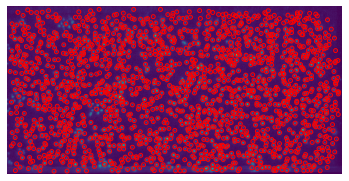

Pos00503


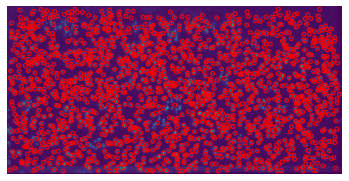

Pos00504


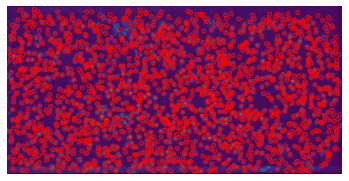

Pos00505


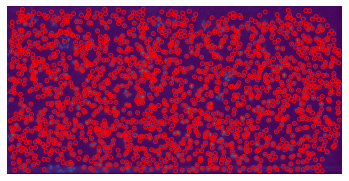

Pos00506


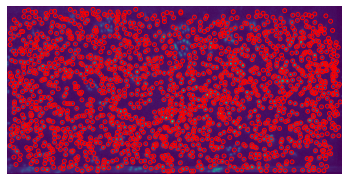

combined image is successfully saved


In [4]:
ma.pks_from_img.combined_image(path_smFRET, POS, ALEX, tr_R2G, apriori_tr_original) #create combined image

107881
107881
Please enter the radius for the ralling ball background estimation10
Please enter the half-width of the molecule aperture for trace extraction, , i.e. for r = 3 it is -3:33
-34066.0 -623.0
16018.100000000002 -533.8000000000002
['Pos00501', 'Pos00502', 'Pos00503', 'Pos00504', 'Pos00505', 'Pos00506', 'Pos00507', 'Pos00508', 'Pos00515', 'Pos00516', 'Pos00517', 'Pos00518', 'Pos00519', 'Pos00520', 'Pos00521', 'Pos00522', 'Pos00757', 'Pos00758', 'Pos00759', 'Pos00760', 'Pos00761', 'Pos00762', 'Pos00763', 'Pos00764', 'Pos00771', 'Pos00772', 'Pos00773', 'Pos00774', 'Pos00775', 'Pos00776', 'Pos00777', 'Pos00778', 'Pos01013', 'Pos01014', 'Pos01015', 'Pos01016', 'Pos01017', 'Pos01018', 'Pos01019', 'Pos01020', 'Pos01027', 'Pos01028', 'Pos01029', 'Pos01030', 'Pos01031', 'Pos01032', 'Pos01033', 'Pos01034', 'Pos01269', 'Pos01270', 'Pos01271', 'Pos01272', 'Pos01273', 'Pos01274', 'Pos01275', 'Pos01276', 'Pos01283', 'Pos01284', 'Pos01285', 'Pos01286', 'Pos01287', 'Pos01288', 'Pos01289', 'P

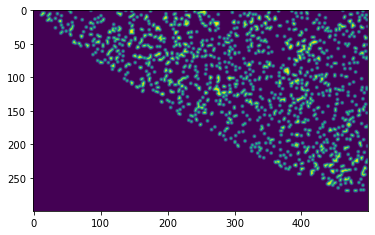

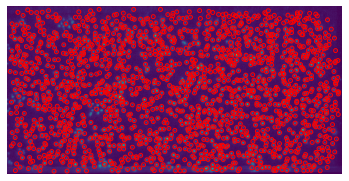

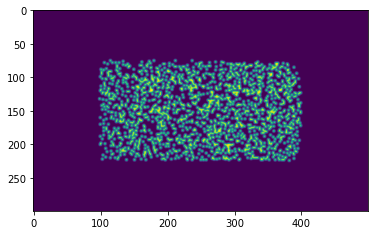

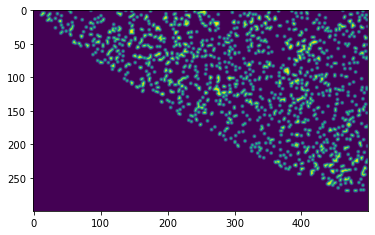

[  5. -14.]


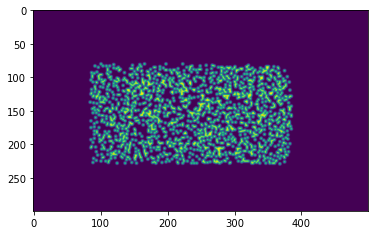

Matched clusters before transform update:  284
Matched clusters after transform update:  296
Out of  1734  smFRET peaks and  1584  clusters
Percentage of matched smFRET peaks:  17
Percentage of matched clusters:  18


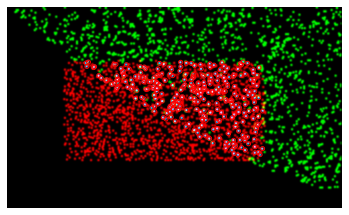

Working on: Pos00503



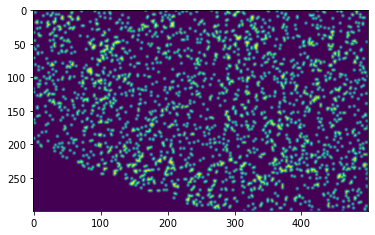

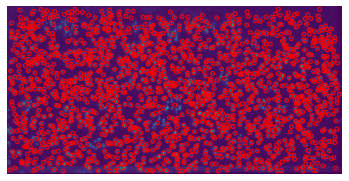

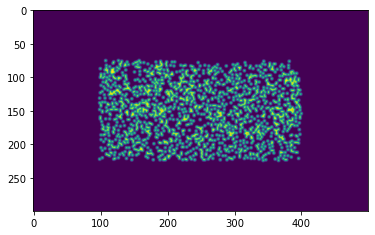

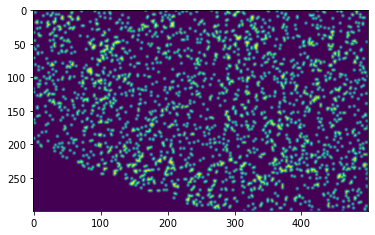

[  6. -13.]


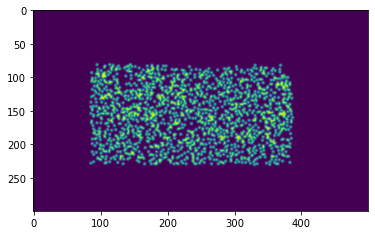

Matched clusters before transform update:  522
Matched clusters after transform update:  523
Out of  1677  smFRET peaks and  2466  clusters
Percentage of matched smFRET peaks:  31
Percentage of matched clusters:  21


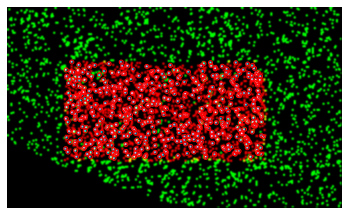

Working on: Pos00504



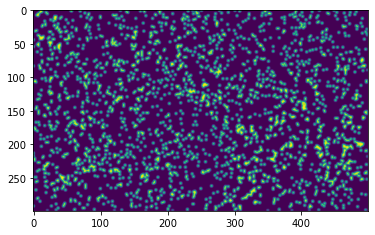

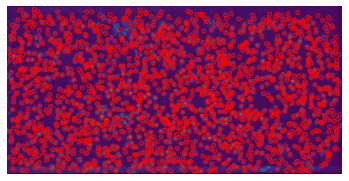

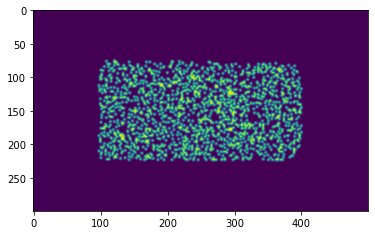

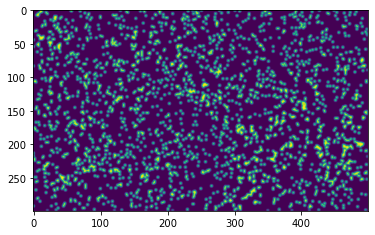

[  6. -12.]


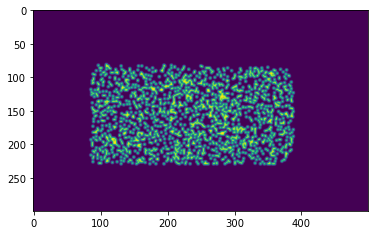

Matched clusters before transform update:  585
Matched clusters after transform update:  583
Out of  1769  smFRET peaks and  2738  clusters
Percentage of matched smFRET peaks:  32
Percentage of matched clusters:  21


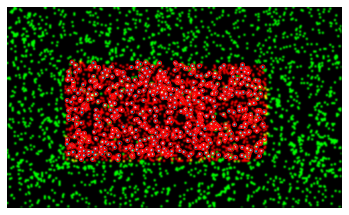

Working on: Pos00505



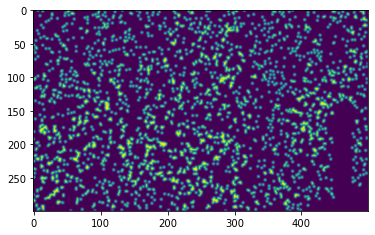

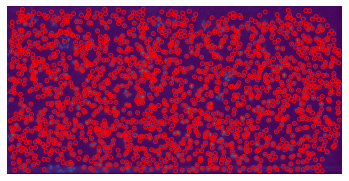

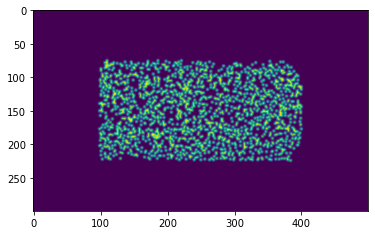

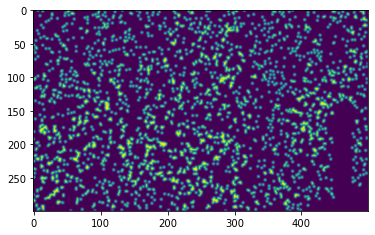

[  7. -10.]


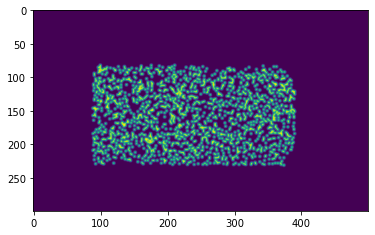

Matched clusters before transform update:  534
Matched clusters after transform update:  548
Out of  1730  smFRET peaks and  2738  clusters
Percentage of matched smFRET peaks:  31
Percentage of matched clusters:  20


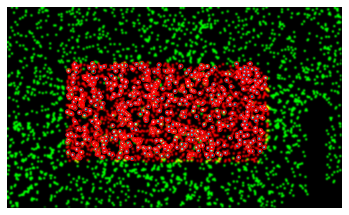

Working on: Pos00506



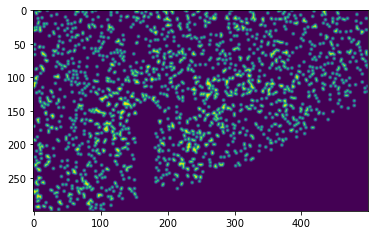

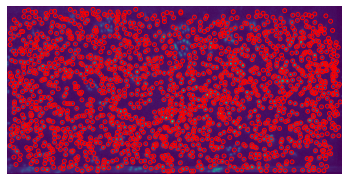

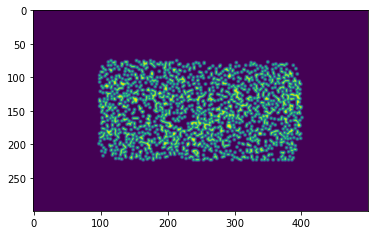

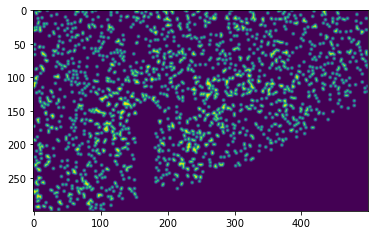

[ 8. -9.]


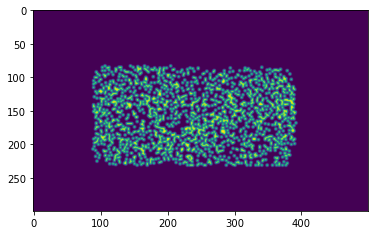

Matched clusters before transform update:  509
Matched clusters after transform update:  528
Out of  1763  smFRET peaks and  2064  clusters
Percentage of matched smFRET peaks:  29
Percentage of matched clusters:  25


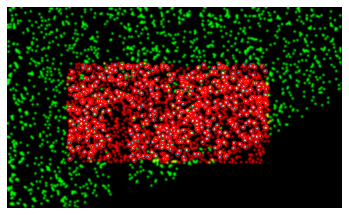

Number of matched FOVs:  5


In [5]:
rb_rad, r = ma.align.alignment(path_smFRET, POS, ALEX, tr_R2G, apriori_tr, x_coord, y_coord, sequence, read2) #main cycle

In [ ]:
ma.traces.extract_traces(path_smFRET, read2, rb_rad, r) #extract traces

Working on: Pos00502
0
Working on frame 0
Please, choose the frame rate5
Working on: Pos00503
1
Working on frame 0
Please, choose the frame rate5
Working on: Pos00504
2
Working on frame 0


In [ ]:
from scipy.io import savemat, loadmat
file_path = fd.askopenfilename(title = "Choose the mat file") 
mdict1 = loadmat(file_path)
